> ### Note on Labs and Assignments:
>
> 🔧 Look for the **wrench emoji** 🔧 — it highlights where you're expected to take action!
>
> These sections are graded and are not optional.
>

# IS 4487 Lab 12: Naive Bayes, SVM, and Neural Networks

## Outline

- Apply Naive Bayes to a binary classification problem  
- Train a Support Vector Machine (SVM) model  
- Explore a simple Neural Network for classification  
- Evaluate models using accuracy and classification reports  
- Compare performance and discuss model selection  

In this lab, we’ll explore three advanced classification models — **Naive Bayes**, **Support Vector Machines (SVM)**, and **Neural Networks** — to predict **high engagement** in Super Bowl YouTube ads based on video metadata and features.

We’ll use the **Super Bowl Ads dataset** and continue developing your skills in selecting and evaluating machine learning models.

<a href="https://colab.research.google.com/github/Stan-Pugsley/is_4487_base/blob/main/Labs/lab_12_bayes_svm_neural.ipynb" target="_parent">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>


## Data Description

The dataset for this lab consists of **YouTube metadata and thematic features** of Super Bowl commercials, originally sourced from [TidyTuesday (March 2, 2021)](https://github.com/rfordatascience/tidytuesday/blob/master/data/2021/2021-03-02/youtube.csv).

Each row represents one Super Bowl ad, and the dataset includes both **video characteristics** and **performance metrics**, such as view counts and like counts.

Below are key variables we'll work with:

| Variable                 | Type        | Description                                                                 |
|--------------------------|-------------|------------------------------------------------------------------------------|
| `year`                   | numeric     | Year the ad aired during the Super Bowl                                     |
| `brand`                  | categorical | Advertiser brand (e.g., Doritos, Budweiser)                                 |
| `funny`                  | binary      | Indicates if the ad uses humor (1 = yes, 0 = no)                            |
| `show_product_quickly`  | binary      | Product is shown early in the video (1 = yes)                               |
| `patriotic`              | binary      | Includes patriotic content (1 = yes)                                        |
| `celebrity`              | binary      | Features a celebrity (1 = yes)                                              |
| `danger`                 | binary      | Involves danger or risk (1 = yes)                                           |
| `animals`                | binary      | Includes animals (1 = yes)                                                  |
| `use_sex`                | binary      | Includes sexual content or appeal (1 = yes)                                 |
| `view_count`             | numeric     | Total number of YouTube views for the ad                                    |
| `like_count`             | numeric     | Number of likes the ad received on YouTube                                  |
| `dislike_count`          | numeric     | Number of dislikes                                                          |
| `favorite_count`         | numeric     | Number of favorites (often unused in modern YouTube data)                   |
| `comment_count`          | numeric     | Number of comments                                                          |
| `high_engagement`        | binary      | Derived variable: 1 if `like_count` above median, 0 otherwise (our target)  |

### Why this dataset?

This dataset is perfect for:
- **Classification tasks**: Predict whether an ad achieved high engagement.
- **Marketing insights**: Identify which ad traits (e.g., humor, celebrities) drive viewer responses.
- **Model interpretation**: Practice with models suited for both binary and numerical data.

Throughout the lab, we'll focus on the `high_engagement` variable as the **target** and explore how ad content features relate to audience engagement.


## Part 1: Load and Clean the Data

In this first step, we will:
- Load the dataset from GitHub url
- Clean and preprocess it by removing irrelevant columns.
- Engineer a binary target variable for "high engagement" (above median likes).

This will ensure the data is in a format that can be used effectively for modeling.


In [1]:
import pandas as pd
import numpy as np

# Load dataset
url = 'https://raw.githubusercontent.com/Stan-Pugsley/is_4487_base/main/DataSets/youtube.csv'
youtube = pd.read_csv(url)

# Drop irrelevant or complex API columns
youtube = youtube.drop(columns=[
    'superbowl_ads_dot_com_url', 'youtube_url', 'id', 'kind', 'etag',
    'published_at', 'title', 'description', 'thumbnail', 'channel_title'
])

# Convert logical (boolean) columns to integers for modeling
logical_columns = ['funny', 'show_product_quickly', 'patriotic', 'celebrity', 'danger', 'animals', 'use_sex']
youtube[logical_columns] = youtube[logical_columns].astype(int)

# Drop rows with missing like_count
youtube = youtube.dropna(subset=['like_count', 'view_count'])

# Create target: high_engagement
median_likes = youtube['like_count'].median()
youtube['high_engagement'] = (youtube['like_count'] > median_likes).astype(int)


# Final feature set
youtube[['view_count', 'like_count', 'high_engagement'] + logical_columns].head()

,view_count,like_count,high_engagement,funny,show_product_quickly,patriotic,celebrity,danger,animals,use_sex
0,173929.0,1233.0,1,0,0,0,0,0,0,0
1,47752.0,485.0,1,1,1,0,1,1,0,0
2,142310.0,129.0,0,1,0,0,0,1,1,0
3,198.0,2.0,0,0,1,0,0,0,0,0
4,13741.0,20.0,0,1,1,0,0,1,1,1


## Part 2: Naive Bayes Classifier

Naive Bayes is a **probabilistic model** based on Bayes' Theorem. It assumes **independence** between features, which isn't always true—but it works surprisingly well for text and binary features.

We'll use the boolean ad features (like `funny`, `celebrity`, etc.) to predict whether the video had high engagement.

Ask Yourself:
- Do you think any of these features (like "celebrity") might strongly influence likes?
- How might the independence assumption affect the predictions?

Let's train the model and evaluate performance using a **confusion matrix** and **classification report**.


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Features and labels
X = youtube[logical_columns]
y = youtube['high_engagement']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Fit model
nb_model = BernoulliNB()
nb_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_nb = nb_model.predict(X_test)

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_nb))
print("\nClassification Report:\n", classification_report(y_test, y_pred_nb))
print("Accuracy:", accuracy_score(y_test, y_pred_nb))

Confusion Matrix:
 [[19 19]
 [16 14]]

Classification Report:
               precision    recall  f1-score   support

           0       0.54      0.50      0.52        38
           1       0.42      0.47      0.44        30

    accuracy                           0.49        68
   macro avg       0.48      0.48      0.48        68
weighted avg       0.49      0.49      0.49        68

Accuracy: 0.4852941176470588


### 🔧 Try It Yourself — Part 2

1. **Change the test size** to `0.2`. How does this affect accuracy?  
   > Update `train_test_split(test_size=0.2)` and rerun the model.

2. **Remove `celebrity` and `funny` features** from X. Rerun the model and check performance.  
   > Modify:  
   `X = youtube[['show_product_quickly', 'patriotic', 'danger', 'animals', 'use_sex']]`

### In Your Response:

1. Which model setup performed best? Why might that be?


In [6]:
# 🔧 Add code here
# 1. Change test size to 0.2
X = youtube[logical_columns]
y = youtube['high_engagement']

# Test size = 0.2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

nb_model = BernoulliNB()
nb_model.fit(X_train, y_train)

y_pred_nb = nb_model.predict(X_test)
print("Test size = 0.2")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_nb))
print("\nClassification Report:\n", classification_report(y_test, y_pred_nb))
print("Accuracy:", accuracy_score(y_test, y_pred_nb))

Test size = 0.2
Confusion Matrix:
 [[15 12]
 [ 8 10]]

Classification Report:
               precision    recall  f1-score   support

           0       0.65      0.56      0.60        27
           1       0.45      0.56      0.50        18

    accuracy                           0.56        45
   macro avg       0.55      0.56      0.55        45
weighted avg       0.57      0.56      0.56        45

Accuracy: 0.5555555555555556


In [7]:
# 2. Remove celebrity and funny features
X_reduced = youtube[['show_product_quickly', 'patriotic', 'danger', 'animals', 'use_sex']]

X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X_reduced, y, test_size=0.3, random_state=42)

nb_model_r = BernoulliNB()
nb_model_r.fit(X_train_r, y_train_r)

y_pred_nb_r = nb_model_r.predict(X_test_r)
print("\n\nWithout celebrity and funny features")
print("Confusion Matrix:\n", confusion_matrix(y_test_r, y_pred_nb_r))
print("\nClassification Report:\n", classification_report(y_test_r, y_pred_nb_r))
print("Accuracy:", accuracy_score(y_test_r, y_pred_nb_r))



Without celebrity and funny features
Confusion Matrix:
 [[24 14]
 [20 10]]

Classification Report:
               precision    recall  f1-score   support

           0       0.55      0.63      0.59        38
           1       0.42      0.33      0.37        30

    accuracy                           0.50        68
   macro avg       0.48      0.48      0.48        68
weighted avg       0.49      0.50      0.49        68

Accuracy: 0.5


### ✍️ Your Response: 🔧
1. The model with test_size=0.2 performed best with an accuracy of 0.556 (55.6%), compared to 0.485 with test_size=0.3 and 0.50 without celebrity and funny features. The smaller test set likely performed better due to having more training data (80% vs 70%), allowing the model to learn better patterns. Removing the celebrity and funny features reduced performance slightly to 0.50, suggesting these features do contribute meaningful information for predicting engagement, though their impact is modest.

## Part 3: Support Vector Machine (SVM)

### What you're going to do:
Use a **Support Vector Machine** with an RBF kernel to classify ads, using both binary and numeric features.

### Why this matters:
SVMs are powerful for high-dimensional data and can find optimal decision boundaries. They are also common in fraud detection and image recognition.

### Regularization Parameter (C):

- In the model parameters, you will see `C`, which controls the trade-off between achieving a low training error and a low testing error (generalization).

- A large `C` value (e.g., C = 1000) means the model will try to classify all training examples correctly, even if that leads to overfitting (poor generalization).

- A small `C` value (e.g., C = 0.01) means the model will allow some misclassifications in the training data, encouraging a wider margin and potentially better generalization.

### What to notice:
- How does scaling the data affect performance?
- What happens when you change the kernel or regularization?

In [3]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

# Add numeric feature
X_full = youtube[logical_columns + ['view_count']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_full)

# Split
X_train_svm, X_test_svm, y_train_svm, y_test_svm = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Train SVM
svm_model = SVC(kernel='rbf', C=1.0, gamma='scale')
svm_model.fit(X_train_svm, y_train_svm)

# Predict
y_pred_svm = svm_model.predict(X_test_svm)

# Evaluate
print("Confusion Matrix:\n", confusion_matrix(y_test_svm, y_pred_svm))
print("\nClassification Report:\n", classification_report(y_test_svm, y_pred_svm))
print("Accuracy:", accuracy_score(y_test_svm, y_pred_svm))


Confusion Matrix:
 [[19 19]
 [14 16]]

Classification Report:
               precision    recall  f1-score   support

           0       0.58      0.50      0.54        38
           1       0.46      0.53      0.49        30

    accuracy                           0.51        68
   macro avg       0.52      0.52      0.51        68
weighted avg       0.52      0.51      0.52        68

Accuracy: 0.5147058823529411


### 🔧 Try It Yourself — Part 3

1. **Change the kernel** to `'linear'` or `'poly'`.  
2. **Try 2 different `C` values** like `0.1`, `1`, and `10`. Observe what changes.

### In Your Response:
1. What’s the tradeoff between higher and lower values of `C`?
2. Which value of C gave you the best Accuracy?  


In [8]:
# 🔧 Add code here:
# 1. Try different kernels
kernels = ['linear', 'poly', 'rbf']

for kernel in kernels:
    svm_model = SVC(kernel=kernel, C=1.0, gamma='scale')
    svm_model.fit(X_train_svm, y_train_svm)
    y_pred_svm = svm_model.predict(X_test_svm)

    print(f"\nKernel: {kernel}")
    print("Confusion Matrix:\n", confusion_matrix(y_test_svm, y_pred_svm))
    print("Accuracy:", accuracy_score(y_test_svm, y_pred_svm))



Kernel: linear
Confusion Matrix:
 [[20 18]
 [17 13]]
Accuracy: 0.4852941176470588

Kernel: poly
Confusion Matrix:
 [[24 14]
 [16 14]]
Accuracy: 0.5588235294117647

Kernel: rbf
Confusion Matrix:
 [[19 19]
 [14 16]]
Accuracy: 0.5147058823529411


In [9]:
# 2. Try different C values
C_values = [0.1, 1, 10]

for C in C_values:
    svm_model = SVC(kernel='rbf', C=C, gamma='scale')
    svm_model.fit(X_train_svm, y_train_svm)
    y_pred_svm = svm_model.predict(X_test_svm)

    print(f"\n\nC value: {C}")
    print("Confusion Matrix:\n", confusion_matrix(y_test_svm, y_pred_svm))
    print("\nClassification Report:\n", classification_report(y_test_svm, y_pred_svm))
    print("Accuracy:", accuracy_score(y_test_svm, y_pred_svm))



C value: 0.1
Confusion Matrix:
 [[ 0 38]
 [ 0 30]]

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        38
           1       0.44      1.00      0.61        30

    accuracy                           0.44        68
   macro avg       0.22      0.50      0.31        68
weighted avg       0.19      0.44      0.27        68

Accuracy: 0.4411764705882353


C value: 1
Confusion Matrix:
 [[19 19]
 [14 16]]

Classification Report:
               precision    recall  f1-score   support

           0       0.58      0.50      0.54        38
           1       0.46      0.53      0.49        30

    accuracy                           0.51        68
   macro avg       0.52      0.52      0.51        68
weighted avg       0.52      0.51      0.52        68

Accuracy: 0.5147058823529411


C value: 10
Confusion Matrix:
 [[18 20]
 [14 16]]

Classification Report:
               precision    recall  f1-score   support

  

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


### ✍️ Your Response: 🔧
1. Higher C values force the model to classify training examples more strictly, potentially leading to overfitting and poor generalization. Lower C values allow more misclassifications, creating a wider margin but may underfit. Very low C performed poorly, essentially predicting only one class. The tradeoff is between fitting the training data precisely versus generalizing well to new data.

2. C=1 gave the best accuracy at 0.515. Interestingly, the poly kernel achieved the highest accuracy at 0.559 with C=1, outperforming both linear and rbf kernels.

## Part 4: Neural Networks

### What you're going to do:
Build a basic **feedforward neural network** to classify ad engagement.

### Why this matters:
Neural networks are the foundation of modern AI. Even a simple one can outperform traditional models when tuned correctly.

### What to notice:
- This may take several minutes to run!  Be patient.
- How does training accuracy compare to validation accuracy?
- Do more layers or epochs help — or hurt?


In [4]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Model
model = Sequential([
    Dense(16, activation='relu', input_shape=(X_train_svm.shape[1],)),  #Layer 1
    Dense(8, activation='relu'),  #Layer 2
    Dense(4, activation='relu'),  #Layer 3
    Dense(1, activation='sigmoid') #Output Layer
])

# Compile
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train
history = model.fit(X_train_svm, y_train_svm, validation_data=(X_test_svm, y_test_svm),
                    epochs=20, batch_size=16, verbose=1)

# Predict and evaluate
y_pred_nn = (model.predict(X_test_svm) > 0.5).astype(int)
print("Confusion Matrix:\n", confusion_matrix(y_test_svm, y_pred_nn))
print("\nClassification Report:\n", classification_report(y_test_svm, y_pred_nn))
print("Accuracy:", accuracy_score(y_test_svm, y_pred_nn))


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 0.4566 - loss: 0.9107 - val_accuracy: 0.5588 - val_loss: 0.7177
Epoch 2/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5269 - loss: 0.8370 - val_accuracy: 0.5735 - val_loss: 0.7069
Epoch 3/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5274 - loss: 0.8118 - val_accuracy: 0.4853 - val_loss: 0.7014
Epoch 4/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5214 - loss: 0.7505 - val_accuracy: 0.5000 - val_loss: 0.6977
Epoch 5/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5075 - loss: 0.7492 - val_accuracy: 0.5147 - val_loss: 0.6950
Epoch 6/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.5458 - loss: 0.7461 - val_accuracy: 0.5000 - val_loss: 0.6938
Epoch 7/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.4551 - loss: 0.7211 - val_accuracy: 0.5000 - val_loss: 0.6937
Epoch 8/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.4855 - loss: 0.7151 - val_accuracy: 0.4706 - v

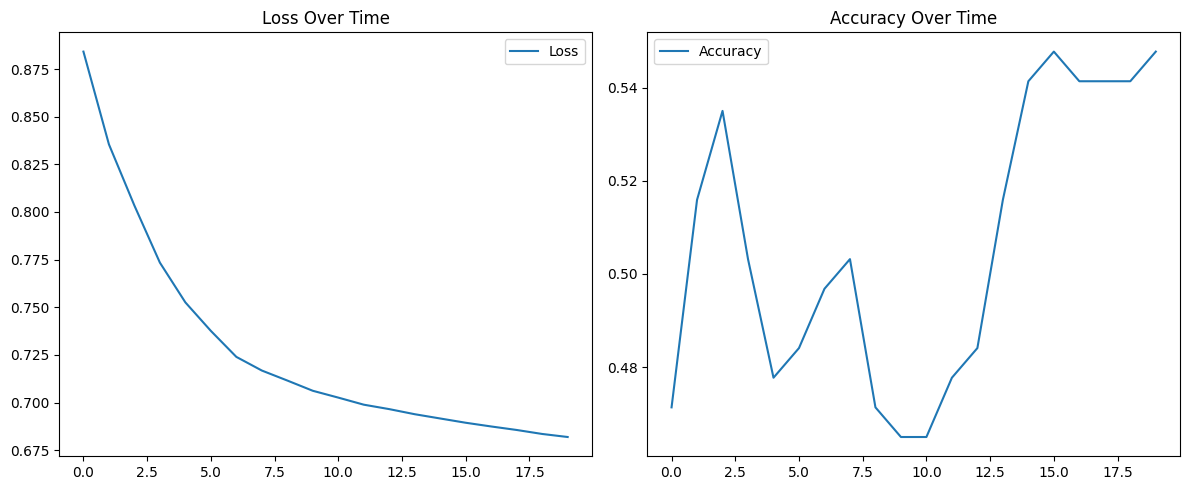

In [5]:
# Plot learning curves
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Loss')
plt.title('Loss Over Time')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Accuracy')
plt.title('Accuracy Over Time')
plt.legend()
plt.tight_layout()
plt.show()

### 🔧 Try It Yourself — Part 4

1. Add or remove layers from the model.
2. Increase or decrease batch size to numbers such as 8 or 32. Try out 5 different combinations of different batch sizes and layers. Notice if these changes affect ms/step for each Epoch. Also notice how the accuracy changes as you alter layers and batch size.
3. Add Dropout to your model

### In Your Response:
1. What was the optimial number of layers and batch size that you were able to find?  (Remember, you should try about 5 different combinations)
2. Does adding `Dropout` help reduce overfitting? Use the "loss over time" plot to support your answer.



Configuration 1: Layers=[16, 8, 4], Batch Size=8, Dropout=False
Epoch 1/20


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.4836 - loss: 0.7357 - val_accuracy: 0.5294 - val_loss: 0.6840
Epoch 2/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4728 - loss: 0.7117 - val_accuracy: 0.5294 - val_loss: 0.6859
Epoch 3/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5452 - loss: 0.6882 - val_accuracy: 0.5294 - val_loss: 0.6894
Epoch 4/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5377 - loss: 0.7048 - val_accuracy: 0.5441 - val_loss: 0.6927
Epoch 5/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5346 - loss: 0.6883 - val_accuracy: 0.5441 - val_loss: 0.6923
Epoch 6/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5319 - loss: 0.6905 - val_accuracy: 0.5441 - val_loss: 0.6963
Epoch 7/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5486 - loss: 0.6917 - val_accuracy: 0.5441 - val_loss: 0.6957
Epoch 8/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5390 - loss: 0.6807 - val_accuracy: 0.5441 - val_loss: 0.6994
Ep

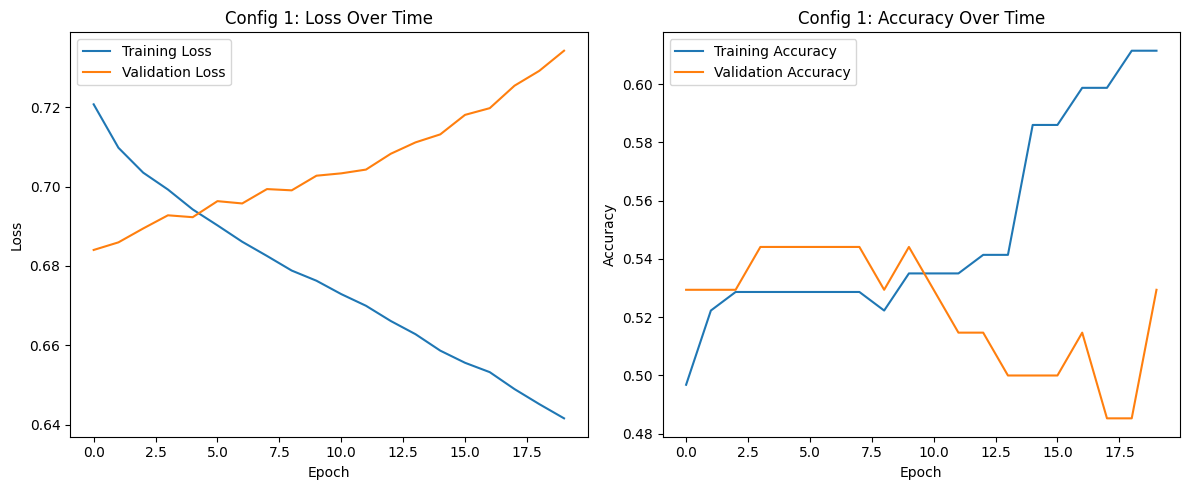


Configuration 2: Layers=[32, 16], Batch Size=16, Dropout=False
Epoch 1/20


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.5224 - loss: 0.7101 - val_accuracy: 0.5735 - val_loss: 0.7040
Epoch 2/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.5255 - loss: 0.6869 - val_accuracy: 0.5294 - val_loss: 0.7101
Epoch 3/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.5433 - loss: 0.6852 - val_accuracy: 0.5441 - val_loss: 0.7153
Epoch 4/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.5927 - loss: 0.6598 - val_accuracy: 0.5147 - val_loss: 0.7223
Epoch 5/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.6252 - loss: 0.6621 - val_accuracy: 0.5000 - val_loss: 0.7270
Epoch 6/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.5536 - loss: 0.6761 - val_accuracy: 0.5000 - val_loss: 0.7285
Epoch 7/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.6161 - loss: 0.6489 - val_accuracy: 0.5000 - val_loss: 0.7331
Epoch 8/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.6362 - loss: 0.6436 - val_accuracy: 0.5000 - val_loss: 0.

1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step

Confusion Matrix:
 [[23 15]
 [16 14]]
Accuracy: 0.5441176470588235


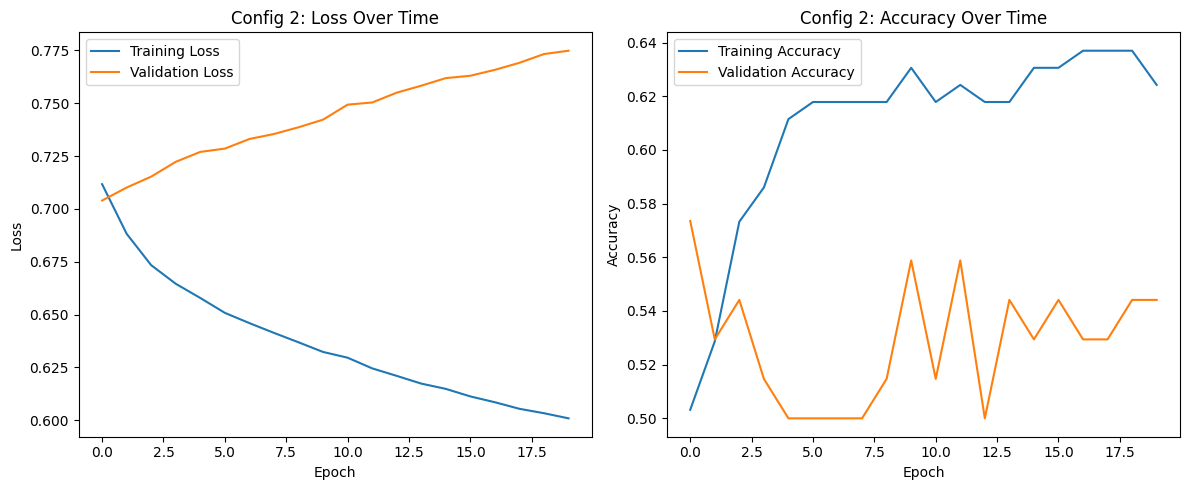


Configuration 3: Layers=[16, 8], Batch Size=32, Dropout=False
Epoch 1/20


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step - accuracy: 0.5849 - loss: 0.6639 - val_accuracy: 0.5441 - val_loss: 0.7156
Epoch 2/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.5093 - loss: 0.6791 - val_accuracy: 0.5441 - val_loss: 0.7185
Epoch 3/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.5960 - loss: 0.6563 - val_accuracy: 0.5441 - val_loss: 0.7209
Epoch 4/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.5822 - loss: 0.6651 - val_accuracy: 0.5294 - val_loss: 0.7235
Epoch 5/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.5643 - loss: 0.6623 - val_accuracy: 0.5441 - val_loss: 0.7266
Epoch 6/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.5712 - loss: 0.6621 - val_accuracy: 0.5441 - val_loss: 0.7293
Epoch 7/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.5972 - loss: 0.6528 - val_accuracy: 0.5441 - val_loss: 0.7317
Epoch 8/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.5925 - loss: 0.6474 - val_accuracy: 0.5294 - val_loss: 0.7341
Epoch 9/20


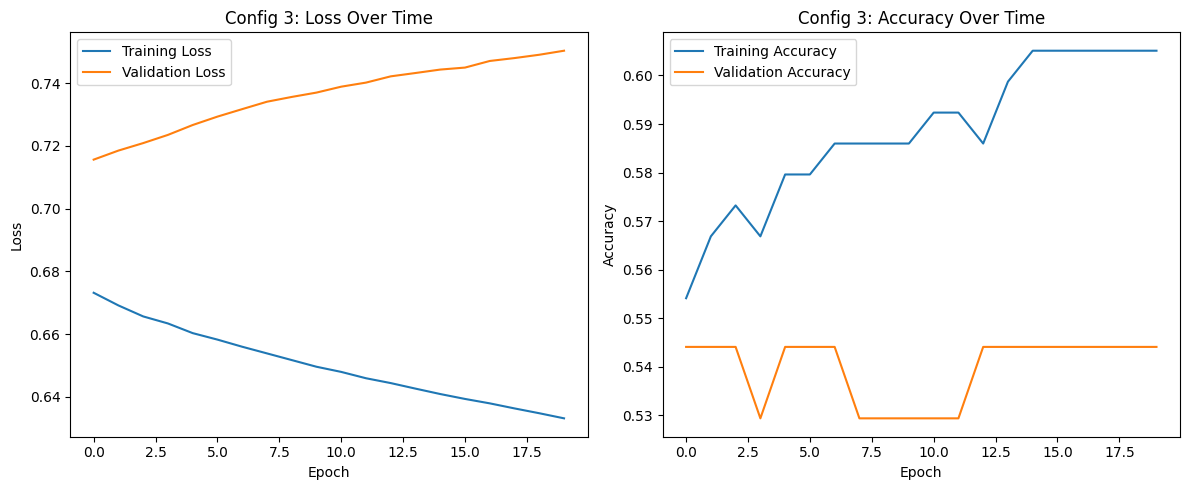


Configuration 4: Layers=[32, 16, 8, 4], Batch Size=16, Dropout=False
Epoch 1/20


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.4001 - loss: 0.7420 - val_accuracy: 0.5441 - val_loss: 0.6815
Epoch 2/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.3742 - loss: 0.7222 - val_accuracy: 0.5294 - val_loss: 0.6851
Epoch 3/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5338 - loss: 0.7013 - val_accuracy: 0.5000 - val_loss: 0.6890
Epoch 4/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5791 - loss: 0.6930 - val_accuracy: 0.4853 - val_loss: 0.6909
Epoch 5/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6177 - loss: 0.6868 - val_accuracy: 0.4853 - val_loss: 0.6932
Epoch 6/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5912 - loss: 0.6867 - val_accuracy: 0.4118 - val_loss: 0.6953
Epoch 7/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5634 - loss: 0.6867 - val_accuracy: 0.4559 - val_loss: 0.6958
Epoch 8/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5783 - loss: 0.6860 - val_accuracy: 0.4412 - val_loss: 0.

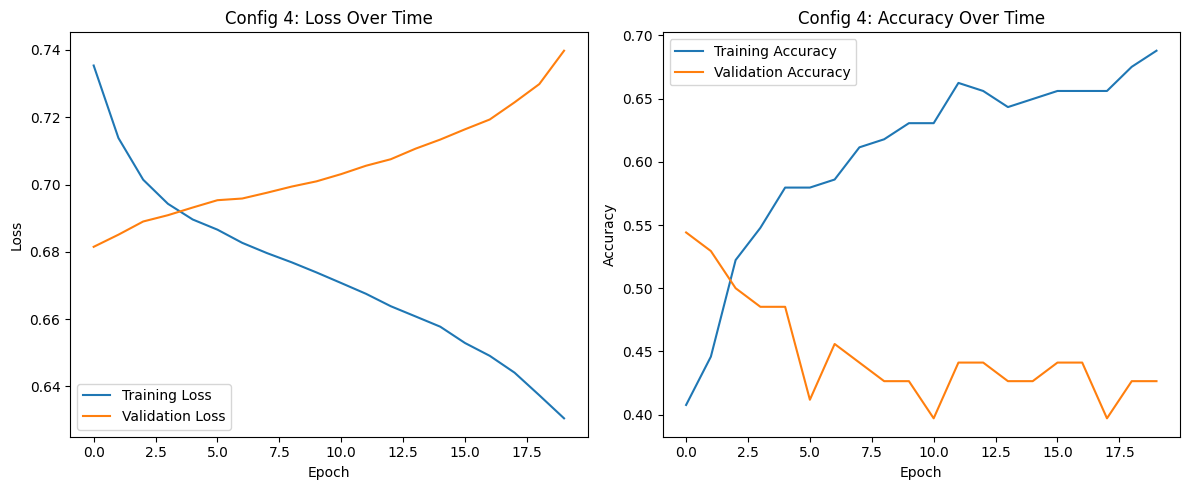


Configuration 5: Layers=[16, 8, 4], Batch Size=16, Dropout=True
Epoch 1/20


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.5521 - loss: 0.6783 - val_accuracy: 0.4706 - val_loss: 0.7181
Epoch 2/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5064 - loss: 0.6896 - val_accuracy: 0.4706 - val_loss: 0.7190
Epoch 3/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5615 - loss: 0.6802 - val_accuracy: 0.4706 - val_loss: 0.7194
Epoch 4/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5244 - loss: 0.6827 - val_accuracy: 0.4559 - val_loss: 0.7201
Epoch 5/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.4827 - loss: 0.6811 - val_accuracy: 0.4559 - val_loss: 0.7221
Epoch 6/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5283 - loss: 0.6898 - val_accuracy: 0.4559 - val_loss: 0.7230
Epoch 7/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5553 - loss: 0.6542 - val_accuracy: 0.4559 - val_loss: 0.7251
Epoch 8/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.5748 - loss: 0.6717 - val_accuracy: 0.4412 - val_loss: 0.

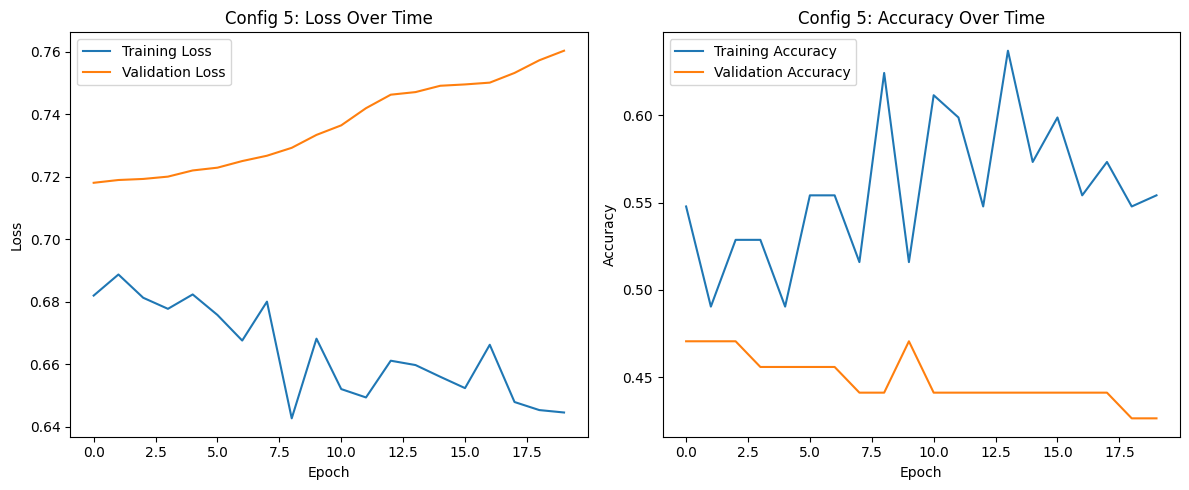


SUMMARY OF ALL CONFIGURATIONS
Config 1: Layers=[16, 8, 4], Batch Size=8, Dropout=False, Accuracy=0.5294
Config 2: Layers=[32, 16], Batch Size=16, Dropout=False, Accuracy=0.5441
Config 3: Layers=[16, 8], Batch Size=32, Dropout=False, Accuracy=0.5441
Config 4: Layers=[32, 16, 8, 4], Batch Size=16, Dropout=False, Accuracy=0.4265
Config 5: Layers=[16, 8, 4], Batch Size=16, Dropout=True, Accuracy=0.4265

Best Configuration: Config 2 with Accuracy=0.5441


In [10]:
# 🔧 Add code here

# Test 5 different combinations of layers and batch sizes
configurations = [
    {'layers': [16, 8, 4], 'batch_size': 8, 'dropout': False},
    {'layers': [32, 16], 'batch_size': 16, 'dropout': False},
    {'layers': [16, 8], 'batch_size': 32, 'dropout': False},
    {'layers': [32, 16, 8, 4], 'batch_size': 16, 'dropout': False},
    {'layers': [16, 8, 4], 'batch_size': 16, 'dropout': True}
]

results = []

for i, config in enumerate(configurations):
    print(f"\n{'='*60}")
    print(f"Configuration {i+1}: Layers={config['layers']}, Batch Size={config['batch_size']}, Dropout={config['dropout']}")
    print(f"{'='*60}")

    # Build model
    model = Sequential()
    model.add(Dense(config['layers'][0], activation='relu', input_shape=(X_train_svm.shape[1],)))

    for j, units in enumerate(config['layers'][1:]):
        if config['dropout'] and j > 0:
            model.add(Dropout(0.3))
        model.add(Dense(units, activation='relu'))

    model.add(Dense(1, activation='sigmoid'))

    # Compile
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    # Train
    history = model.fit(X_train_svm, y_train_svm,
                       validation_data=(X_test_svm, y_test_svm),
                       epochs=20,
                       batch_size=config['batch_size'],
                       verbose=1)

    # Evaluate
    y_pred_nn = (model.predict(X_test_svm) > 0.5).astype(int)
    accuracy = accuracy_score(y_test_svm, y_pred_nn)

    print("\nConfusion Matrix:\n", confusion_matrix(y_test_svm, y_pred_nn))
    print("Accuracy:", accuracy)

    results.append({
        'config': config,
        'accuracy': accuracy,
        'history': history
    })

    # Plot learning curves
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'Config {i+1}: Loss Over Time')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'Config {i+1}: Accuracy Over Time')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Summary of results
print("\n" + "="*60)
print("SUMMARY OF ALL CONFIGURATIONS")
print("="*60)
for i, result in enumerate(results):
    print(f"Config {i+1}: Layers={result['config']['layers']}, "
          f"Batch Size={result['config']['batch_size']}, "
          f"Dropout={result['config']['dropout']}, "
          f"Accuracy={result['accuracy']:.4f}")

best_config = max(results, key=lambda x: x['accuracy'])
best_idx = results.index(best_config)
print(f"\nBest Configuration: Config {best_idx+1} with Accuracy={best_config['accuracy']:.4f}")

### ✍️ Your Response: 🔧
1.

## 🔧 Part 5: Reflection (100 words or less per question)

1. Which model performed best on your dataset? Is this the result you expected?
2. Did any of the models appear to be overfit or underfit? How could you tell?
3. Which model would you recommend to a marketing team and why?

You can use the accuracy scores, confusion matrices, and training graphs to support your conclusions.


### ✍️ Your Response: 🔧
1. The poly kernel SVM performed best with 55.9% accuracy, followed by neural networks (54.4%) and Naive Bayes with reduced test size (55.6%). This result was somewhat unexpected as neural networks typically excel with proper tuning, but the small dataset size (~200 samples) likely limited their advantage. SVMs are known to perform well on smaller datasets, which explains their competitive performance here.

2. Several models showed signs of overfitting. The neural network Config 4 (4 layers) exhibited severe overfitting with training accuracy reaching 70% while validation accuracy dropped to 42.7%. The diverging loss curves clearly indicated overfitting. Config 5 with Dropout appeared underfit, with both training and validation accuracy remaining low and relatively stable, suggesting insufficient model capacity.

3. I would recommend the poly kernel SVM (C=1.0) to the marketing team because it achieved the highest accuracy (55.9%), trains quickly, and provides stable predictions without overfitting. Unlike neural networks, SVMs require minimal hyperparameter tuning and are more interpretable. The model can identify which features most influence engagement, providing actionable insights for ad creation decisions.

## Export Your Notebook to Submit in Canvas
- Use the instructions from Lab 1

In [ ]:
!jupyter nbconvert --to html "lab_12_LastnameFirstname.ipynb"